Article
A Bottom-Up Approach to Lithium-Ion Battery Cost
Modeling with a Focus on Cathode Active Materials
https://www.mdpi.com/1996-1073/12/3/504/pdf-vor

# Model domain:
- Porous graphite anode
- Porous electrolyte separator (LiPF6 & Ethylene Carbonate:Dimethyl Carbonate)
- Porous LiCoO2 cathode 

State variables:
- Li volume fraction $X_{\rm Li}$ in the graphite, $X_{\rm Li,an}$
- Electric potential of the graphite
- Concentration of the Li+ in the electrolyte in the anode.
- Electrolyte electric potential in the anode, $\phi_{\rm an}$
- Concentration of the Li+ in the electrolyte in the separator.
- Electrolyte electric potential in the separator, $\phi_{\rm sep}$
- Concentration of the Li+ in the electrolyte in the cathode.
- Electrolyte electric potential in the cathode, $\phi_{\rm ca}$
- Li intercalation fraction $X_{\rm Li}$ in the LCO, $X_{\rm Li,ca}$
- Electric potential in the LCO


# Double Layer Current 

Conservation of charge for the anode double layer:
\begin{equation}
    \frac{\partial Q_{\rm an}}{\partial t} = 0 = -I_{\rm ext} -i _{\rm Far}A_{\rm surf} - i_{\rm dl}A_{\rm surf}
\end{equation}
Given:
\begin{equation}
    I_{\rm ext} = i_{\rm ext}A_{\rm geo}
\end{equation}
We get:
\begin{equation}
    i_{\rm dl} = -i_{\rm ext}\frac{A_{\rm geo}}{A_{\rm surf}} -i _{\rm Far}
\end{equation}
Given:
\begin{equation}
    A_{\rm surf} = 4\pi r_p^2 N_p
\end{equation}   
and Given:
\begin{equation}
    n_p = \frac{N_p}{A_{geo}}
\end{equation}
and Given:
\begin{equation} 
    \varepsilon_s = \frac{V_{solids}}{V_{total}} = \frac{N_p\frac{4}{3}{\pi}r_p^3}{A_{geo} H_{el}}
\end{equation}
We get:
\begin{equation}
    n_p = \frac{3 H_{el} \varepsilon_s}{4 \pi r_p^3}
\end{equation}
and We get:
\begin{equation}
    A_{\rm surf} = 4\pi r_p^2 A_{geo} n_p
\end{equation} 
Which gives:
\begin{equation}
    \frac{A_{geo}}{A_{\rm surf}} = \frac{1}{4\pi r_p^2 n_p}
\end{equation} 
Which gives:
\begin{equation}
    \frac{A_{geo}}{A_{\rm surf}} = \frac{4 \pi r_p^3}{4\pi r_p^2 3 H_{el} \varepsilon_s}
\end{equation} 
Which reduces to:
\begin{equation}
    \frac{A_{geo}}{A_{\rm surf}} = \frac{r_p}{3 H_{el} \varepsilon_s} = A_{\rm fac}
\end{equation} 
Which gives:
\begin{equation}
    i_{\rm dl} = -i_{\rm ext}\frac{r_p}{3 H_{el} \varepsilon_s} -i _{\rm Far}
\end{equation}

# Double Layer Potential

Given:
\begin{equation}
    \frac{dQ_{\rm dl}}{dt} = i_{\rm dl}A_{\rm surf}
\end{equation}
and Given:
\begin{equation}
    Q_{\rm dl} = A_{\rm surf}C_{\rm dl}\Delta\phi_{\rm dl}
\end{equation}
For constant $A_{\rm surf}$ and $C_{\rm dl}$ We get:
\begin{equation}
    \frac{dA_{\rm surf}C_{\rm dl}\Delta\phi_{\rm dl}}{dt} = A_{\rm surf}C_{\rm dl}\frac{d\Delta\phi_{\rm dl}}{dt} = A_{\rm surf}i_{\rm dl}
\end{equation}
Given:
\begin{equation}
    \Delta\phi_{\rm dl} = \phi_{\rm elyte} - \phi_{\rm an}
\end{equation}
We get:
\begin{equation}
    \frac{d\Delta\phi_{\rm dl}}{dt} =\frac{d\left(\phi_{\rm elyte} - \phi_{\rm an}\right)}{dt} = \frac{i_{\rm dl}}{C_{\rm dl}} = \frac{1}{C_{\rm dl}}\left(-i_{\rm ext}A_{\rm fac} -i _{\rm Far}\right)
\end{equation}
Using the anode as our reference potential gives:
\begin{equation}
    \phi_{\rm an} = 0V
\end{equation}
Which gives:
\begin{equation}
    \Delta\phi_{\rm dl} = \phi_{\rm elyte}
\end{equation}


In [111]:
# Inputs:

C_rate = 6 # How many charges per hour? 

T = 298 #K W

r_p_an = 4e-6 #m  (https://www.sigmaaldrich.com/catalog/product/supelco/50226u?lang=en&region=US)
phi_an_0 = 0 #V 
C_dl_an = 1e4 #F/m2
i_o_an = 4.0  #A/m2
n_an = -1
beta_an = 0.5
H_an = 45e-6  #m (https://arxiv.org/abs/1803.04317)
density_graphite = 2260 #kg/m3 (https://www.entegris.com/content/dam/web/resources/manuals-and-guides/manual-properties-and-characteristics-of-graphite-109441.pdf)
capacity_graphite = 350 #Ah/kg
eps_graphite = 0.65 #(https://www.entegris.com/content/dam/web/resources/manuals-and-guides/manual-properties-and-characteristics-of-graphite-109441.pdf)
dPhi_eq_an = -1.6
MW_graphite = 0.072 #kg/mol

phi_sep_0 = 1.8  #V W 

r_p_ca = 8.5e-6 #m
phi_ca_0 = 4.6  #V 
C_dl_ca = 1e4 #F/m2
i_o_ca = 100 #A/m2
n_ca = -1
beta_ca = 0.5
H_ca = 50e-6  #m
density_LCO = 2292  #kg/m3
capacity_LCO = 175  #Ah/kg
eps_LCO = 0.65
dPhi_eq_ca = 2.6
MW_LCO = 0.098 #kg/mol

# How deep do we want to charge/discharge?
charge_frac = 0.9

H_elyte = 25e-6 #m

nu_Li = 1 #mol Li/mol rxn
d_battery = 0.018 #m

X_Li_an_0 = 0.001
X_Li_ca_0 = 0.1

### Capacity

\begin{equation}
    {\rm Cap} = C_{\rm AM}\rho_{\rm AM}\varepsilon_{\rm AM}H_{\rm el}
\end{equation}


In [112]:
# Initialize:
phi_dl_an_0 = phi_an_0 - phi_sep_0
phi_dl_ca_0 = phi_ca_0 - phi_sep_0


capacity_anode = capacity_graphite*H_an*eps_graphite*density_graphite
capacity_cathode = capacity_LCO*H_ca*eps_LCO*density_LCO
capacity_area = min(capacity_anode,capacity_cathode)


t_final = charge_frac*3600./C_rate
i_ext = C_rate*capacity_area

A_fac_an = r_p_an/3/H_an/eps_graphite
A_fac_ca = r_p_ca/3/H_ca/eps_LCO
A_geo = pi*(d_battery/2)**2

In [113]:
# Constants
F = 96485
R = 8.3145

In [114]:
import numpy as np
from math import exp
from math import pi

def residual(t,SV):
    dSV_dt = np.zeros_like(SV)
    
    eta_an = SV[0] - dPhi_eq_an
    i_Far_an = i_o_an*(exp(-n_an*F*beta_an*eta_an/R/T)
                      - exp(n_an*F*(1-beta_an)*eta_an/R/T))
    i_dl_an = i_ext*A_fac_an - i_Far_an
    
    dSV_dt[0] = i_dl_an/C_dl_an
    
    
    eta_ca = SV[1] - dPhi_eq_ca
    i_Far_ca = i_o_ca*(exp(-n_ca*F*beta_ca*eta_ca/R/T)
                      - exp(n_ca*F*(1-beta_ca)*eta_ca/R/T))
    i_dl_ca = -i_ext*A_fac_ca - i_Far_ca
    
    
    dSV_dt[1] = i_dl_ca/C_dl_ca
    
    V_cell = dSV_dt[0]-dSV_dt[1]

    
    return dSV_dt
 

In [115]:
from scipy.integrate import solve_ivp

SV_0 = np.array([phi_dl_an_0, phi_dl_ca_0])

time_span = np.array([0,t_final])

solution = solve_ivp(residual,time_span,SV_0,rtol=1e-6, atol=1e-8)

#print (solution) 



Text(0.5, 0, 'Time(s)')

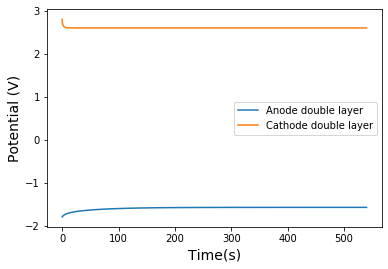

In [116]:
from matplotlib import pyplot as plt
for var in solution.y:
    plt.plot(solution.t,var)
    
plt.legend(['Anode double layer','Cathode double layer'])

plt.legend(['Anode double layer','Cathode double layer'])
plt.ylabel('Potential (V)',fontsize=14)
plt.xlabel('Time(s)',fontsize=14)

Text(0.5, 0, 'Time(s)')

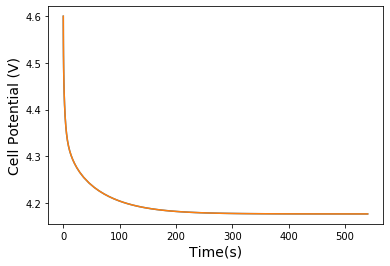

In [117]:
#print (solution.y[0])
#print (solution.y[1])
for var in solution.y:
    V_cell = solution.y[1]-solution.y[0]
    plt.plot(solution.t,V_cell)

#plt.plot(V_cell)
plt.ylabel('Cell Potential (V)',fontsize=14)
plt.xlabel('Time(s)',fontsize=14)

In [118]:
C_elyte = 1100 #mol/m3

# Species order: Li+, PF6-, solvent
X_k_1 = np.array([0.03, 0.03, 0.94])
X_k_2 = np.array([0.06, 0.06, 0.88])

z_k = np.array([1., -1., 0.])

T = 318.  #K

dY = 30e-6

D_k = np.array([1.52e-10, 0.25e-10, 1e-12])

phi_1 = 0.9
phi_2 = 0.5

d_part = 5e-6

eps_elyte = 0.23
n_brugg = -0.5

R = 8.3145 # J/mol-K
F = 96485  # C/mol equiv


In [119]:
def residual(t,SV):
    dSV_dt = np.zeros_like(SV)
    dX_Li_dt = np.zeros_like(SV)
    
    eta_an = SV[0] - dPhi_eq_an
    i_Far_an = i_o_an*(exp(-n_an*F*beta_an*eta_an/R/T)
                      - exp(n_an*F*(1-beta_an)*eta_an/R/T))
    i_dl_an = i_ext*A_fac_an - i_Far_an
    
    #dSV_dt[0] = i_dl_an/C_dl_an
    
    s_dot_an = i_Far_an*nu_Li/n_an/F

    C_0_an = density_graphite/MW_graphite
    N_graphite = 3*H_an*eps_graphite*A_geo/(4*pi*r_p_an**3)
    A_surf = 4*pi*(r_p_an**2)*N_graphite

    dX_Li_dt[0] = 1/C_0_an/eps_graphite*A_surf/A_geo/H_an*s_dot_an
    
    
    eta_ca =  - dPhi_eq_ca
    i_Far_ca = i_oSV[1]_ca*(exp(-n_ca*F*beta_ca*eta_ca/R/T)
                      - exp(n_ca*F*(1-beta_ca)*eta_ca/R/T))
    i_dl_ca = -i_ext*A_fac_ca - i_Far_ca
    
    
    #dSV_dt[1] = i_dl_ca/C_dl_ca
    s_dot_ca = i_Far_ca*nu_Li/n_ca/F

    C_0_ca = density_LCO/MW_LCO
    N_LCO = 3*H_an*eps_LCO*A_geo/(4*pi*r_p_ca**3)
    A_surf = 4*pi*(r_p_ca**2)*N_LCO

    dX_Li_dt[1] = 1/C_0_ca/eps_graphite*A_surf/A_geo/H_ca*s_dot_ca
    
    #V_cell = dSV_dt[0]-dSV_dt[1]
    
     return dX_Li_dt

In [120]:
from scipy.integrate import solve_ivp

SV_0 = np.array([phi_dl_an_0, phi_dl_ca_0])

time_span = np.array([0,t_final])

solution = solve_ivp(residual,time_span,SV_0,rtol=1e-6, atol=1e-8)

#print (solution) 

Text(0.5, 0, 'Time(s)')

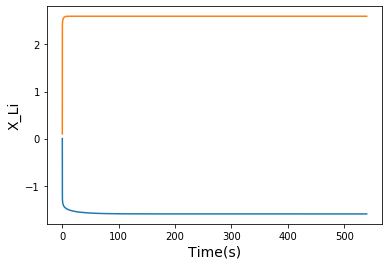

In [122]:
from matplotlib import pyplot as plt
for var in solution.y:
    plt.plot(solution.t,var)
    
#plt.legend(['Anode double layer','Cathode double layer'])

#plt.legend(['Anode double layer','Cathode double layer'])
plt.ylabel('X_Li',fontsize=14)
plt.xlabel('Time(s)',fontsize=14)

In [137]:
t = 0
t_final = 200
end = t_final + 1
X_Li_an = np.empty(end)

#X_Li_an[0] = 0.001

delta_phi = np.linspace(-0.9,0.05,100)
i_Far_an = np.zeros_like(delta_phi)
for ind, E in enumerate(delta_phi):
    eta = delta_phi[ind]-dPhi_eq_an
    i_Far_an[ind] = i_o_an*(exp(-n_an*F*beta_an*eta_an[t]/R/T)
                     - exp(n_an*F*(1-beta_an)*eta_an[t]/R/T))

    
for t in range (0, t_final):   
    s_dot_an = i_Far_an[t]*nu_Li/n_an/F
    C_0_an = density_graphite/MW_graphite
    N_graphite = 3*H_an*eps_graphite*A_geo/(4*pi*r_p_an**3)
    A_surf = 4*pi*(r_p_an**2)*N_graphite
    dX_Li_dt = 1/C_0_an/eps_graphite*A_surf/A_geo/H_an*s_dot_an
    X_Li_an[t+1] = X_Li_an[t] + dX_Li_dt
    #X_Li_an.append()
    #print(dX_Li_dt)
    t = t+1

IndexError: index 100 is out of bounds for axis 0 with size 100

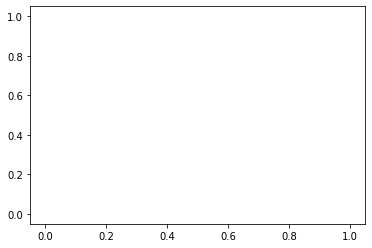

In [133]:
t = np.arange(0, end)
plt.plot(t, X_Li_an[t])